In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
%matplotlib inline

In [2]:
df = pd.read_csv('merged_data_final.csv')
print(df.head(5))

df["view"].fillna("AP",inplace=True) #All images with blank views are of AP view

   Unnamed: 0                  filename          label view
0           0  Radiography/NORMAL-1.PNG  non-infection   AP
1           1  Radiography/NORMAL-2.PNG  non-infection   AP
2           2  Radiography/NORMAL-3.PNG  non-infection   AP
3           3  Radiography/NORMAL-4.PNG  non-infection   AP
4           4  Radiography/NORMAL-5.PNG  non-infection   AP


Radiography/NORMAL-1.PNG


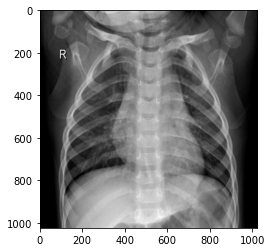

In [3]:
print(df.filename[0])
image = cv2.imread(df.filename[1])
#print(image)
plt.imshow(image)

In [4]:
##DATA SPLITTING##

from shutil import copy
from os import listdir
from random import seed
from random import random
import os

seed(1)
val_ratio = 0.20

#Splitting data into 80% training and 20% test 

src_directories = ["FINAL/covid_pneumonia",
                   "FINAL/healthy", 
                   "FINAL/pneumonia"]
train_directories = ["train/covid_pneumonia", 
                         "train/healthy", 
                         "train/pneumonia"]
test_directories = ["test/covid_pneumonia",
                        "test/healthy",
                        "test/pneumonia"]

for i in range(3):
    for file in listdir(src_directories[i]):
        src = src_directories[i] + "/" + file
        if random() < val_ratio:
            td = test_directories[i] + "/" 
            copy(src, td)
        else:
            td = train_directories[i] + "/" 
            copy(src, td)

In [5]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for i in listdir(train_directories[0]):
      count0+=1
for i in listdir(train_directories[1]):
      count2+=1
for i in listdir(train_directories[2]):
      count4+=1
for i in listdir(test_directories[0]):
      count1+=1
for i in listdir(test_directories[1]):
      count3+=1
for i in listdir(test_directories[2]):
      count5+=1

#printing total number of images in each category in training and test sets
print("Covid-pnuemonia -> train: " +str(count0)+ " , test: " +str(count1))
print("Healthy -> train: " +str(count2)+ " , test: " +str(count3))
print("Non-covid pnuemonia -> train: " +str(count4)+ " , test: " +str(count5))
print("========================================")
print("Total train images : " + str(count0+ count2 + count4))
print("Total test images : " + str(count1+ count3 + count5))
print("Total Images : " + str(count0+count1+count2+count3+count4+count5))

Covid-pnuemonia -> train: 594 , test: 140
Healthy -> train: 1184 , test: 287
Non-covid pnuemonia -> train: 1349 , test: 353
Total train images : 3127
Total test images : 780
Total Images : 3907
